<a href="https://colab.research.google.com/github/SrijaRallabhandyy/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Library to work with regular expressions, required during cleaning the data
import re
# Working with numpy arrays during data exploration, like count 
import numpy as np 
# Used to store the csv data in data frames and perform various operations like groupby etc
import pandas as pd 
# The below given libraries are used for plotting various graphs during data exploration
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# The below given library is used for stemminga dn lemmatization
from nltk.stem import WordNetLemmatizer
# Scikit Learn is the library used to apply various algorithms as shown below
# Import used for Support Vector Machine Library
from sklearn.svm import LinearSVC 
# Import to implement Beroulli Naive Bayes Algorithm for classification
from sklearn.naive_bayes import BernoulliNB 
# Logistic regresssion for classification
from sklearn.linear_model import LogisticRegression 
# Import to split the complete dataset into train and test data
from sklearn.model_selection import train_test_split 
 # Import used for working on Term Frequency and Inverse Docuemnt Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
#Code used to asses the algorithm using Accuracy, F1Score etc, and also used to build the confusion matrix. To draw the AUC-ROC Curve
from sklearn.metrics import confusion_matrix, classification_report 

In [ ]:
# mounting the google drive. 
# Used to load the dataset in google drive and use it in the run time environment whenever necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text'] 
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/Explorytics_Dataset/Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1107058,4,1971515459,Sat May 30 07:17:16 PDT 2009,NO_QUERY,BoulderSarahV,@ChrisAnthonyski Hey Chris! Good to see you o...
218958,0,1976280131,Sat May 30 16:59:07 PDT 2009,NO_QUERY,PolaScheps,i need my BFF right now i miss him so much! a...
490711,0,2183521306,Mon Jun 15 14:37:12 PDT 2009,NO_QUERY,Marcooooos,is really bored
442700,0,2067351057,Sun Jun 07 12:11:29 PDT 2009,NO_QUERY,xSistaGurlx,@Vadiva08 that movie made me cry
1270494,4,2000411931,Mon Jun 01 22:03:34 PDT 2009,NO_QUERY,classhole,the dandy warhols - all i have to do is dream ...


In [ ]:
# Printing the column names of the dataframe
df.columns 
# Printing the dimensions and datatype details of the dataframe
df.info() 
# Displaying the number of rows contaning null values
np.sum(df.isnull().any(axis=1)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


0

In [ ]:
# Printing the number of unique values of the dataframe under the column named 'target'
df['target'].nunique() 

2

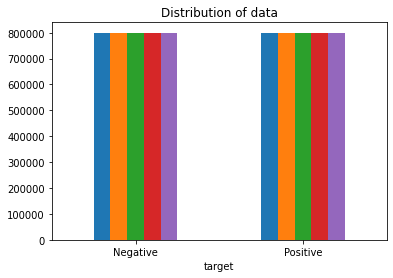

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

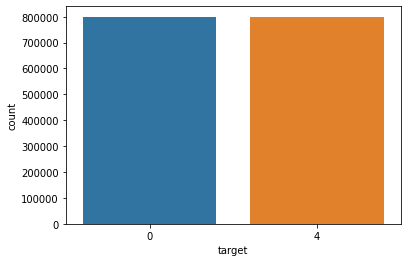

In [ ]:
import seaborn as sns
#  Printing the number of value/tweets under the postive/negative target category 
# Here 0 represents Negative sentiment and 4 represents Positive Sentiment
sns.countplot(x='target', data=df)

In [ ]:
# Extracting the tweet text and target(Sentinment) columns data into a new dataframe
data=df[['text','target']]
# Under the target values replacing 4 by 1 which means, now,
# Here 0 represents Negative sentiment and 1 represents Positive Sentiment
data['target'] = data['target'].replace(4,1)
data['target'].unique()
# Storing the text of the tweets having positive sentiment in data_pos and negative sentiments in data_neg
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Concatenating the grouped negative and positive datasets to a single data set
# Currently, first 8 lakh rows would have positive sentiment and 8 lakh - 16 lakh rows represnt negative sentiment data
dataset = pd.concat([data_pos, data_neg])
# Coverting all the twitter text to lowercase
dataset['text']=dataset['text'].str.lower()
# Printing the last 50 lines of the dataset to see the sample
dataset['text'].tail(50)

799950                                 is sad about farrah 
799951    going to chill out @ arne's place. the @ is se...
799952       @gillieschick your boyfriend misses you, too. 
799953    back frpm sports and iâ´m so ill - thatâ´s not...
799954           omg i just found out farrah fawcett died. 
799955    @lisahopecyrus yes he was such a jerk and so m...
799956    is sad that farrah fawcett just died  http://p...
799957            @alex11790 yes yes i am  its exhaustinggg
799958    one of my fav icons has passed away - rip farr...
799959    been in photoshop 2 days straight and finally ...
799960    so tired, not ready for work, throat hurts, co...
799961    @ladykatiejane sorry you lost your watch  we k...
799962    @rlangeles no.  i slept ina lil.. but it still...
799963           cheer---2-a-days  today and tomorrow..... 
799964    today's hair style : basic bun - i do have to ...
799965          farrah was one of my favorite actresses..  
799966    all dressed up and ready for g

In [ ]:
import string
# Getting and Printing the list of all the punctuations under the library string
english_punctuations = string.punctuation
print(string.punctuation)
punctuations_list = english_punctuations
# A function to remove the punctuations from the collected tweets
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
# Function call and storage of the cleaned data in the same column of the data frame 'dataset'
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: text, dtype: object

In [ ]:
# A list which contains all the unnecessary words which are to be removed from the corpus during the data cleaning process
stopwordlist = ['a','u','r','about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',"but","im","'",
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves',"now","day","want","going","day","today","go","work","guys"]

In [ ]:
#  Converting the list to set so that the repeated values are not taken into consideration
STOPWORDS = set(stopwordlist)
# A function to clean the unnecessary words given in the list and combine the remaining words into a sentence
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Function call and storage of the cleaned data in the same column of the data frame 'dataset'
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                            love health4uandpets best
800001      meeting one besties tonight cant wait girl talk
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
# A function to clean the repeated charecters for example
# consider a tweet having the word "thankssss" which would be converted
# to thanks after running this function
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
# Function call and storage of the cleaned data in the same column of the data frame 'dataset'
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

799995      sick spending laying bed listening taylorswif13
799996                                                gmail
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [ ]:
# A function used to cleaned the urls in the tweets using the regular expression
# In the regular expression we used a conceept of checking words
# starting with https or www, which would actually cover all the URLS
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
# Function call and storage of the cleaned data in the same column of the data frame 'dataset'
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

799995      sick spending laying bed listening taylorswif13
799996                                                gmail
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [ ]:
# A function to remove numeric charecters from the tweets
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

799995        sick spending laying bed listening taylorswif
799996                                                gmail
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [ ]:
# A tokenizer function to convert our complete sentence into tokens
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000                         [love, healthuandpets, best]
800001    [meeting, one, besties, tonight, cant, wait, g...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:

# A process where stemming is applied to each and every word in the sentence

# Stemming is basically removing the suffix from a word and reduce it to its root word.
# For example: “Flying” is a word and its suffix is “ing”, 
# if we remove “ing” from “Flying” then we will get base word or root word which is “Fly”. 
# We uses these suffix to create a new word from original stem word.
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                          [love, healthuandpet, best]
800001    [meet, one, besti, tonight, cant, wait, girl, ...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [ ]:
# Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, 
# normally aiming to remove inflectional endings only and to return the base 
# or dictionary form of a word, which is known as the lemma .
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    final_text=" ".join([word for word in text])
    return final_text
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


800000                              love healthuandpet best
800001           meet one besti tonight cant wait girl talk
800002    darealsunisakim thank twitter add sunisa got m...
800003    sick realli cheap hurt much eat real food plu ...
800004                         lovesbrooklyn effect everyon
Name: text, dtype: object

In [ ]:
# Taking the text and target into 2 variables required for application of algorithms
X=dataset.text
y=dataset.target

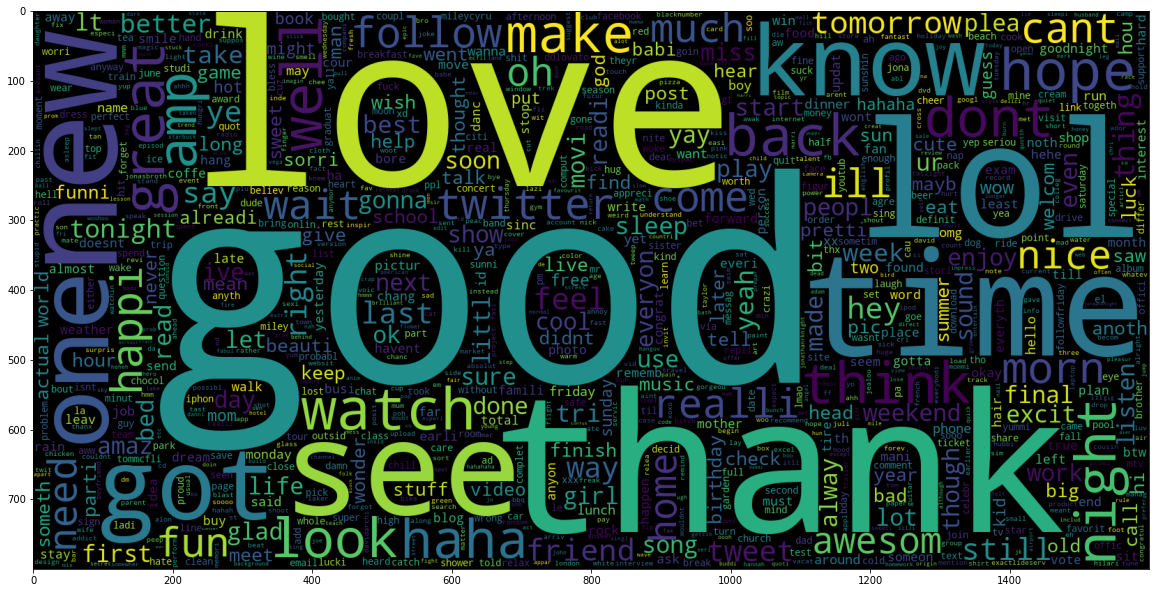

In [ ]:
#  Taking the last 8lakh tweets to postive variable and plotting the word cloud
data_pos = dataset['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(str(v) for v in data_pos))
plt.imshow(wc)

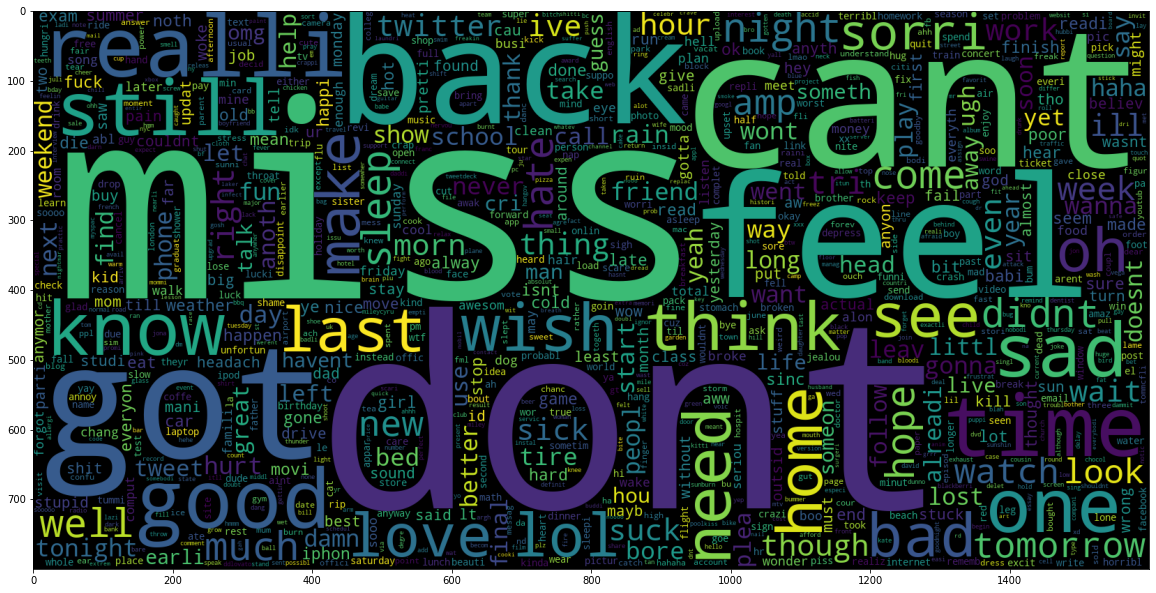

In [ ]:
#  Taking the first 8lakh tweets to negative variable and plotting the word cloud
data_neg = dataset['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(str(v) for v in data_neg))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Taking 95% of the dataset into training data and 5% to test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
print(X_train)

1423766    solaravada juz check dat linkur goin place boy...
569639                                        angeliqueh sim
70798                jess want u sleep seper bed summer over
30730      order draco tavern mostestest favoritest ringw...
1512120                             joshwhedon love dollhous
                                 ...                        
1524937    arriv waitin fo pm jst wanna hear gorgeou voic...
401868                    regina grad parti noon realli know
1321390    jazzyg quotweirdquot nice new pictur amp good ...
174580                                                  yeah
818431     welcom pcnlove thank follow hannah hope enjoy ...
Name: text, Length: 960000, dtype: object


In [ ]:
# Refer the following for TfidfVectorizer function 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     39900
           1       0.77      0.81      0.79     40100

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



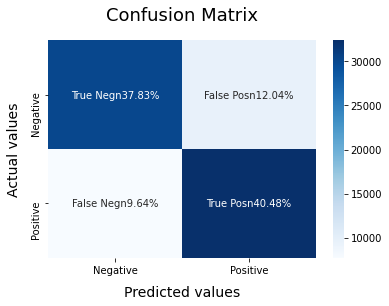

In [ ]:
# Bernoulli Naive Byes Classification and model evaluation
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

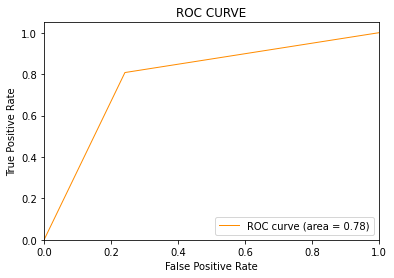

In [ ]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39900
           1       0.79      0.82      0.80     40100

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



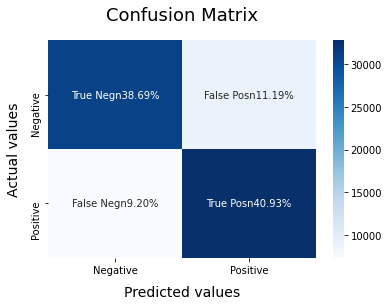

In [ ]:
# Support Vector Machine Classification and model evaluation

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

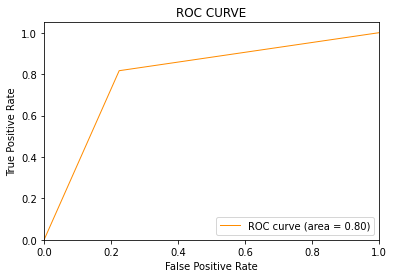

In [ ]:

# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    319945
           1       0.79      0.82      0.81    320055

    accuracy                           0.80    640000
   macro avg       0.80      0.80      0.80    640000
weighted avg       0.80      0.80      0.80    640000



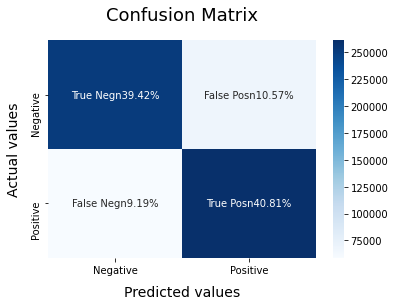

In [ ]:
# Logistic Regression Classification and model evaluation

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

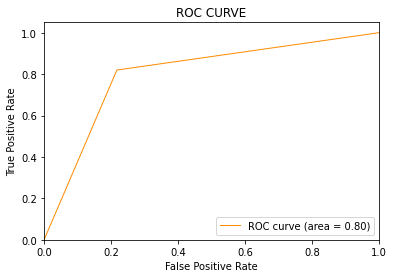

In [ ]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()